In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
aus = pd.read_csv('/content/drive/MyDrive/faus.csv') # These are the csv files of corresponding countries tweets and their predicted sentiments
ind = pd.read_csv('/content/drive/MyDrive/Find.csv')
indo = pd.read_csv('/content/drive/MyDrive/Indo.csv')
jap = pd.read_csv('/content/drive/MyDrive/Jap.csv')
br = pd.read_csv('/content/drive/MyDrive/Br.csv')

In [14]:
aus['country'] = 'Australia'
ind['country'] = 'India'
indo['country'] = 'Indonesia'
jap['country'] = 'Japan'
br['country'] = 'Brazil'

In [15]:
jap.columns


Index(['Unnamed: 0', 'Tweet', 'text', 'date', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial',
       'Official report', 'Surprise', 'Joking', 'country'],
      dtype='object')

In [16]:
ind = ind.drop(columns=['Unnamed: 0'],axis=1)
indo = indo.drop(columns=['Unnamed: 0'],axis=1)
aus = aus.drop(columns=['Unnamed: 0'],axis=1)
jap = jap.drop(columns=['Unnamed: 0'],axis=1)
br = br.drop(columns=['Unnamed: 0'],axis=1)

In [17]:
df1 = pd.concat([aus,ind], axis=0)
df2 = pd.concat([df1,indo], axis=0)
df3 = pd.concat([df2,br], axis=0)
data = pd.concat([df3,jap], axis=0)

In [18]:
data = data.reset_index()
data

,index,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country
0,0,i just cannot imagine selfish antivaxxers r...,@Gr3yJ3d1 @420_BTC @newscomauHQ I just can’t i...,Wed Dec 08 05:13:37 +0000 2021,0,0,0,0,0,0,1,0,0,0,1,Australia
1,1,rt oh wow so antivaxxers in melbourne are pr...,RT @krunchymoses: Oh wow. So antivaxxers in Me...,Wed Dec 08 05:27:06 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
2,2,i think boosters at 3 months might be better f...,I think boosters at 3 months might be better f...,Wed Dec 08 05:35:48 +0000 2021,0,0,0,0,1,0,1,0,0,1,0,Australia
3,3,psa this is your regular reminder that anyth...,#PSA: This is your regular reminder that anyth...,Wed Dec 08 05:37:09 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
4,4,rt canada’s antimaskers antivaxxers are not a...,RT @MatthewSloly: Canada’s antimaskers/antivax...,Wed Dec 08 05:48:35 +0000 2021,0,0,0,0,0,0,1,1,0,0,0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988142,118707,rt in 2021 is calling for a global effort t...,"RT @sanofipasteur: In 2021, @WHO is calling fo...",1353967591291834368,1,0,0,0,0,0,0,0,1,0,0,Japan
988143,118708,rt dyk respiratory syncytial virus or rsv ...,RT @sanofipasteur: #DYK Respiratory syncytial ...,1313484412366053377,0,0,0,0,0,0,0,0,1,0,0,Japan
988144,118709,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan
988145,118710,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan


In [19]:
data = data.drop(columns=['index'],axis=1)
data

,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country
0,i just cannot imagine selfish antivaxxers r...,@Gr3yJ3d1 @420_BTC @newscomauHQ I just can’t i...,Wed Dec 08 05:13:37 +0000 2021,0,0,0,0,0,0,1,0,0,0,1,Australia
1,rt oh wow so antivaxxers in melbourne are pr...,RT @krunchymoses: Oh wow. So antivaxxers in Me...,Wed Dec 08 05:27:06 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
2,i think boosters at 3 months might be better f...,I think boosters at 3 months might be better f...,Wed Dec 08 05:35:48 +0000 2021,0,0,0,0,1,0,1,0,0,1,0,Australia
3,psa this is your regular reminder that anyth...,#PSA: This is your regular reminder that anyth...,Wed Dec 08 05:37:09 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
4,rt canada’s antimaskers antivaxxers are not a...,RT @MatthewSloly: Canada’s antimaskers/antivax...,Wed Dec 08 05:48:35 +0000 2021,0,0,0,0,0,0,1,1,0,0,0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988142,rt in 2021 is calling for a global effort t...,"RT @sanofipasteur: In 2021, @WHO is calling fo...",1353967591291834368,1,0,0,0,0,0,0,0,1,0,0,Japan
988143,rt dyk respiratory syncytial virus or rsv ...,RT @sanofipasteur: #DYK Respiratory syncytial ...,1313484412366053377,0,0,0,0,0,0,0,0,1,0,0,Japan
988144,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan
988145,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan


In [20]:
df = data.copy()

In [21]:
df.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking', 'country'],
      dtype='object')

In [22]:
data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
data = data.dropna(subset=['date'])
data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
data['month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

<ipython-input-22-ad2ca06caceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
<ipython-input-22-ad2ca06caceb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')


In [ ]:
def get_lists1(data):
    emotions = data.columns[3:14]
    #data = data[data['country']=='India']
    months = ["March", "April", "May", "June", "July", "August", "September","October","November"]
    march = [data[data['month'] == '2020-03'][x].sum() for x in emotions]
    april = [data[data['month'] == '2020-04'][x].sum() for x in emotions]
    may = [data[data['month'] == '2020-05'][x].sum() for x in emotions]
    june = [data[data['month'] == '2020-06'][x].sum() for x in emotions]
    july = [data[data['month'] == '2020-07'][x].sum() for x in emotions]
    august = [data[data['month'] == '2020-08'][x].sum() for x in emotions]
    september = [data[data['month'] == '2020-09'][x].sum() for x in emotions]
    october = [data[data['month'] == '2020-10'][x].sum() for x in emotions]
    november = [data[data['month'] == '2020-11'][x].sum() for x in emotions]
    # december = [data[data['month'] == '2020-12'][x].sum() for x in emotions]
    # january = [data[data['month'] == '2021-01'][x].sum() for x in emotions]
    # february = [data[data['month'] == '2021-02'][x].sum() for x in emotions]


    return march, april, may, june, july, august, september, october, november


In [ ]:
def get_lists2(data):
    emotions = data.columns[3:14]
    #data = data[data['country']=='Japan']
    months = ["February","March", "April", "May", "June", "July"]
    #december = [data[data['month'] == '2020-12'][x].sum() for x in emotions]
    #january = [data[data['month'] == '2021-01'][x].sum() for x in emotions]
    february = [data[data['month'] == '2021-02'][x].sum() for x in emotions]
    march = [data[data['month'] == '2021-03'][x].sum() for x in emotions]
    april = [data[data['month'] == '2021-04'][x].sum() for x in emotions]
    may = [data[data['month'] == '2021-05'][x].sum() for x in emotions]
    june = [data[data['month'] == '2021-06'][x].sum() for x in emotions]
    july = [data[data['month'] == '2021-07'][x].sum() for x in emotions]
   
    return february, march, april, may, june, july

In [ ]:
def get_lists3(data):
    emotions = data.columns[3:14]
    #data = data[data['country']=='Japan']
    months = ["August", "September","October","November","December","January"]
    
    august = [data[data['month'] == '2021-08'][x].sum() for x in emotions]
    september = [data[data['month'] == '2021-09'][x].sum() for x in emotions]
    october = [data[data['month'] == '2021-10'][x].sum() for x in emotions]
    november = [data[data['month'] == '2021-11'][x].sum() for x in emotions]
    december = [data[data['month'] == '2021-12'][x].sum() for x in emotions]
    january = [data[data['month'] == '2022-01'][x].sum() for x in emotions]

    return august, september, october, november, december, january

In [ ]:
def monthwise3(august, september, october, november, december, january):

    df = pd.DataFrame({
                       
                    'August' : {'Optimistic' : august[0],
                                'Thankful' : august[1],
                                'Empathetic' : august[2],
                                'Pessimistic' : august[3],
                                'Anxious' : august[4],
                                'Sad' : august[5],
                                'Annoyed' : august[6],
                                'Denial' : august[7],
                                'Official report' : august[8],
                                'Surprise' : august[9],
                                'Joking' : august[10]},
                       
                        'September' : {'Optimistic' : september[0],
                                'Thankful' : september[1],
                                'Empathetic' : september[2],
                                'Pessimistic' : september[3],
                                'Anxious' : september[4],
                                'Sad' : september[5],
                                'Annoyed' : september[6],
                                'Denial' : september[7],
                                'Official report' : september[8],
                                'Surprise' : september[9],
                                'Joking' : september[10]},
                       
                       'October' : {'Optimistic' : october[0],
                                'Thankful' : october[1],
                                'Empathetic' : october[2],
                                'Pessimistic' : october[3],
                                'Anxious' : october[4],
                                'Sad' : october[5],
                                'Annoyed' : october[6],
                                'Denial' : october[7],
                                'Official report' : october[8],
                                'Surprise' : october[9],
                                'Joking' : october[10]},
                       
                       
                       'November' : {'Optimistic' : november[0],
                                'Thankful' : november[1],
                                'Empathetic' : november[2],
                                'Pessimistic' : november[3],
                                'Anxious' : november[4],
                                'Sad' : november[5],
                                'Annoyed' : november[6],
                                'Denial' : november[7],
                                'Official report' : november[8],
                                'Surprise' : november[9],
                                'Joking' : november[10]},
                       
                       'December' : {'Optimistic' : december[0],
                                'Thankful' : december[1],
                                'Empathetic' : december[2],
                                'Pessimistic' : december[3],
                                'Anxious' : december[4],
                                'Sad' : december[5],
                                'Annoyed' : december[6],
                                'Denial' : december[7],
                                'Official report' : december[8],
                                'Surprise' : december[9],
                                'Joking' : december[10]},
                       
                       'January' : {'Optimistic' : january[0],
                                'Thankful' : january[1],
                                'Empathetic' : january[2],
                                'Pessimistic' : january[3],
                                'Anxious' : january[4],
                                'Sad' : january[5],
                                'Annoyed' : january[6],
                                'Denial' : january[7],
                                'Official report' : january[8],
                                'Surprise' : january[9],
                                'Joking' : january[10]},
        
                       
                       })
    return df

In [ ]:
def monthwise1(march, april, may, june, july, august, september, october, november):

    df = pd.DataFrame({'Mar' : {'Optimistic' : march[0],
                                'Thankful' : march[1],
                                'Empathetic' : march[2],
                                'Pessimistic' : march[3],
                                'Anxious' : march[4],
                                'Sad' : march[5],
                                'Annoyed' : march[6],
                                'Denial' : march[7],
                                'Official report' : march[8],
                                'Surprise' : march[9],
                                'Joking' : march[10]},
                    
                    'Apr' : {'Optimistic' : april[0],
                                'Thankful' : april[1],
                                'Empathetic' : april[2],
                                'Pessimistic' : april[3],
                                'Anxious' : april[4],
                                'Sad' : april[5],
                                'Annoyed' : april[6],
                                'Denial' : april[7],
                                'Official report' : april[8],
                                'Surprise' : april[9],
                                'Joking' : april[10]},
                        'May' : {'Optimistic' : may[0],
                                'Thankful' : may[1],
                                'Empathetic' : may[2],
                                'Pessimistic' : may[3],
                                'Anxious' : may[4],
                                'Sad' : may[5],
                                'Annoyed' : may[6],
                                'Denial' : may[7],
                                'Official report' : may[8],
                                'Surprise' : may[9],
                                'Joking' : may[10]},
                    
                    'June' : {'Optimistic' : june[0],
                                'Thankful' : june[1],
                                'Empathetic' : june[2],
                                'Pessimistic' : june[3],
                                'Anxious' : june[4],
                                'Sad' : june[5],
                                'Annoyed' : june[6],
                                'Denial' : june[7],
                                'Official report' : june[8],
                                'Surprise' : june[9],
                                'Joking' : june[10]},
                       
                        'July' : {'Optimistic' : july[0],
                                'Thankful' : july[1],
                                'Empathetic' : july[2],
                                'Pessimistic' : july[3],
                                'Anxious' : july[4],
                                'Sad' : july[5],
                                'Annoyed' : july[6],
                                'Denial' : july[7],
                                'Official report' : july[8],
                                'Surprise' : july[9],
                                'Joking' : july[10]},
                    
                    'August' : {'Optimistic' : august[0],
                                'Thankful' : august[1],
                                'Empathetic' : august[2],
                                'Pessimistic' : august[3],
                                'Anxious' : august[4],
                                'Sad' : august[5],
                                'Annoyed' : august[6],
                                'Denial' : august[7],
                                'Official report' : august[8],
                                'Surprise' : august[9],
                                'Joking' : august[10]},
                       
                        'September' : {'Optimistic' : september[0],
                                'Thankful' : september[1],
                                'Empathetic' : september[2],
                                'Pessimistic' : september[3],
                                'Anxious' : september[4],
                                'Sad' : september[5],
                                'Annoyed' : september[6],
                                'Denial' : september[7],
                                'Official report' : september[8],
                                'Surprise' : september[9],
                                'Joking' : september[10]},
                       
                       'October' : {'Optimistic' : october[0],
                                'Thankful' : october[1],
                                'Empathetic' : october[2],
                                'Pessimistic' : october[3],
                                'Anxious' : october[4],
                                'Sad' : october[5],
                                'Annoyed' : october[6],
                                'Denial' : october[7],
                                'Official report' : october[8],
                                'Surprise' : october[9],
                                'Joking' : october[10]},
                       
                       
                       'November' : {'Optimistic' : november[0],
                                'Thankful' : november[1],
                                'Empathetic' : november[2],
                                'Pessimistic' : november[3],
                                'Anxious' : november[4],
                                'Sad' : november[5],
                                'Annoyed' : november[6],
                                'Denial' : november[7],
                                'Official report' : november[8],
                                'Surprise' : november[9],
                                'Joking' : november[10]},
        
                       
                       })
    return df

In [ ]:
def monthwise2( february, march, april, may, june, july):

    df = pd.DataFrame({
                       
                        'February' : {'Optimistic' : february[0],
                                'Thankful' : february[1],
                                'Empathetic' : february[2],
                                'Pessimistic' : february[3],
                                'Anxious' : february[4],
                                'Sad' : february[5],
                                'Annoyed' : february[6],
                                'Denial' : february[7],
                                'Official report' : february[8],
                                'Surprise' : february[9],
                                'Joking' : february[10]},

        
        'Mar' : {'Optimistic' : march[0],
                                'Thankful' : march[1],
                                'Empathetic' : march[2],
                                'Pessimistic' : march[3],
                                'Anxious' : march[4],
                                'Sad' : march[5],
                                'Annoyed' : march[6],
                                'Denial' : march[7],
                                'Official report' : march[8],
                                'Surprise' : march[9],
                                'Joking' : march[10]},
                    
                    'Apr' : {'Optimistic' : april[0],
                                'Thankful' : april[1],
                                'Empathetic' : april[2],
                                'Pessimistic' : april[3],
                                'Anxious' : april[4],
                                'Sad' : april[5],
                                'Annoyed' : april[6],
                                'Denial' : april[7],
                                'Official report' : april[8],
                                'Surprise' : april[9],
                                'Joking' : april[10]},
                        'May' : {'Optimistic' : may[0],
                                'Thankful' : may[1],
                                'Empathetic' : may[2],
                                'Pessimistic' : may[3],
                                'Anxious' : may[4],
                                'Sad' : may[5],
                                'Annoyed' : may[6],
                                'Denial' : may[7],
                                'Official report' : may[8],
                                'Surprise' : may[9],
                                'Joking' : may[10]},
                    
                    'June' : {'Optimistic' : june[0],
                                'Thankful' : june[1],
                                'Empathetic' : june[2],
                                'Pessimistic' : june[3],
                                'Anxious' : june[4],
                                'Sad' : june[5],
                                'Annoyed' : june[6],
                                'Denial' : june[7],
                                'Official report' : june[8],
                                'Surprise' : june[9],
                                'Joking' : june[10]},
                       
                        'July' : {'Optimistic' : july[0],
                                'Thankful' : july[1],
                                'Empathetic' : july[2],
                                'Pessimistic' : july[3],
                                'Anxious' : july[4],
                                'Sad' : july[5],
                                'Annoyed' : july[6],
                                'Denial' : july[7],
                                'Official report' : july[8],
                                'Surprise' : july[9],
                                'Joking' : july[10]},                       
                       })
    return df

In [ ]:
aug_in, sep_in , oct_in, nov_in, dec_in, jan_in = get_lists3(data[data['country']=='Brazil'])  #by using get_lists1, get_lists2 and get_lists3 tweets for that particular country can be segregated monthwise
in_df = monthwise3(aug_in, sep_in , oct_in, nov_in, dec_in, jan_in)  #monthwise function make dataframe for some months i.e monthwise 1, 2 and 3 makes 3 datasets from the March 2020 to Jan 2022.

Text(0, 0.5, 'Number of Tweets in Brazil')

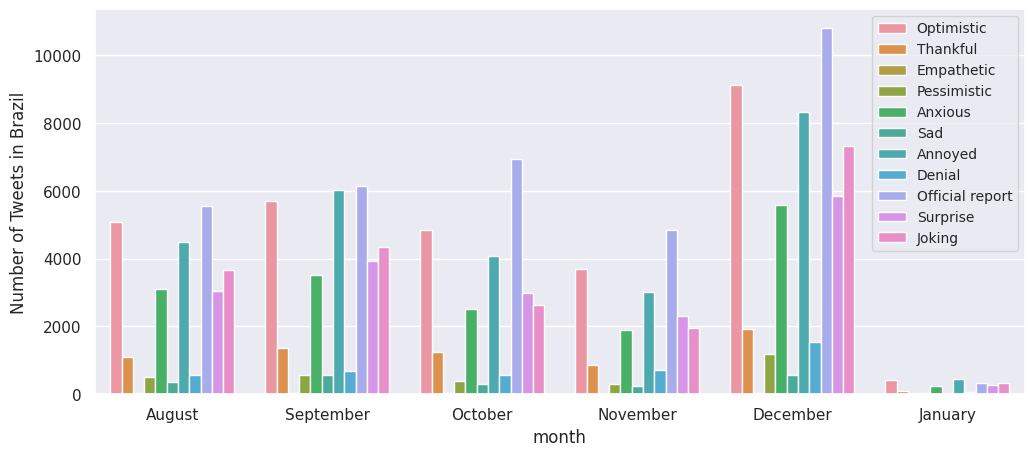

In [ ]:
plt.figure(figsize = (12, 5))
sns.set(font_scale = 1)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = in_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper right', fontsize = 10)
g.set_ylabel('Number of Tweets in Brazil')

In [ ]:
feb_in, mar_in, apr_in, may_in, jun_in, jul_in = get_lists2(data[data['country']=='Australia'])
in_df = monthwise2(feb_in, mar_in, apr_in, may_in, jun_in, jul_in)

Text(0, 0.5, 'Number of Tweets in Australia')

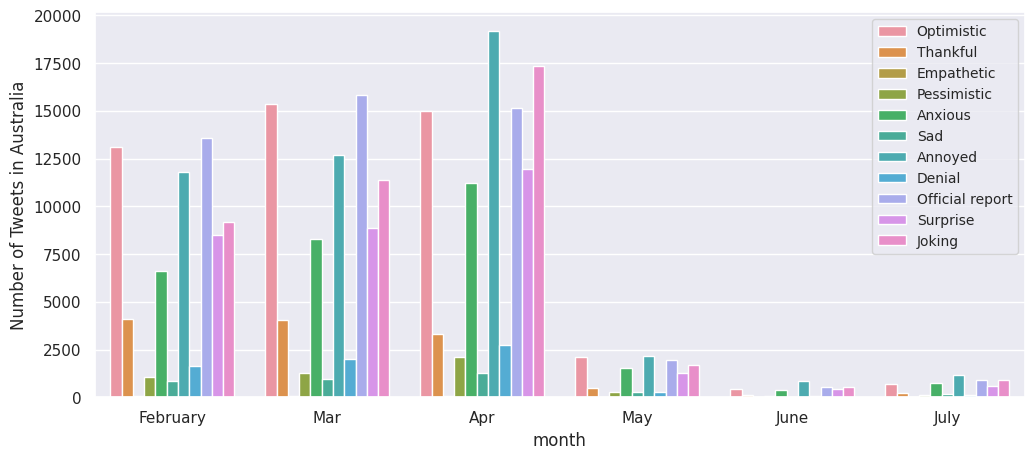

In [ ]:
plt.figure(figsize = (12, 5))
sns.set(font_scale = 1)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = in_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper right', fontsize = 10)
g.set_ylabel('Number of Tweets in Australia')

In [23]:
labels = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic',
       'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report', 'Surprise',
       'Joking']

In [24]:
df[labels]  = df[labels].mul({'Optimistic':2,'Thankful':3, 'Empathetic':0, 'Pessimistic':-4, 'Anxious':-2, 'Sad':-3, 'Annoyed':-1, 'Denial':-5, 'Official report':0,'Surprise':0,'Joking':1})

In [25]:
df[labels]

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,0,0,0,0,0,0,-1,0,0,0,1
1,0,0,0,0,0,0,-1,0,0,0,0
2,0,0,0,0,-2,0,-1,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,0
4,0,0,0,0,0,0,-1,-5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
988142,2,0,0,0,0,0,0,0,0,0,0
988143,0,0,0,0,0,0,0,0,0,0,0
988144,2,3,0,0,0,0,0,0,0,0,0
988145,2,3,0,0,0,0,0,0,0,0,0


In [26]:
score = df[labels].sum(axis=1)
score

0         0
1        -1
2        -3
3        -1
4        -6
         ..
988142    2
988143    0
988144    5
988145    5
988146    5
Length: 988147, dtype: int64

In [27]:
score = score/11
score

0         0.000000
1        -0.090909
2        -0.272727
3        -0.090909
4        -0.545455
            ...   
988142    0.181818
988143    0.000000
988144    0.454545
988145    0.454545
988146    0.454545
Length: 988147, dtype: float64

In [28]:
data['polarity_score'] = score
data.head()

<ipython-input-28-4304e8ac1755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity_score'] = score


,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country,month,polarity_score
0,i just cannot imagine selfish antivaxxers r...,@Gr3yJ3d1 @420_BTC @newscomauHQ I just can’t i...,2021-12-08 05:13:37,0,0,0,0,0,0,1,0,0,0,1,Australia,2021-12,0.000000
1,rt oh wow so antivaxxers in melbourne are pr...,RT @krunchymoses: Oh wow. So antivaxxers in Me...,2021-12-08 05:27:06,0,0,0,0,0,0,1,0,0,0,0,Australia,2021-12,-0.090909
2,i think boosters at 3 months might be better f...,I think boosters at 3 months might be better f...,2021-12-08 05:35:48,0,0,0,0,1,0,1,0,0,1,0,Australia,2021-12,-0.272727
3,psa this is your regular reminder that anyth...,#PSA: This is your regular reminder that anyth...,2021-12-08 05:37:09,0,0,0,0,0,0,1,0,0,0,0,Australia,2021-12,-0.090909
4,rt canada’s antimaskers antivaxxers are not a...,RT @MatthewSloly: Canada’s antimaskers/antivax...,2021-12-08 05:48:35,0,0,0,0,0,0,1,1,0,0,0,Australia,2021-12,-0.545455


In [29]:
data[data["country"]=="Indonesia"][data['Sad']==1]

<ipython-input-29-874bc0b20a6c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["country"]=="Indonesia"][data['Sad']==1]


,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country,month,polarity_score
677525,rt anti vaxxer kickboxing champion frederic s...,RT @297_ArubaLover: Anti-vaxxer kickboxing cha...,2021-12-29 06:15:07,0,0,0,0,0,1,0,0,1,0,0,Indonesia,2021-12,-0.272727
677533,rt heartbreaking last text that anti vaxxer b...,RT @MailOnline: Heartbreaking last text that a...,2021-12-06 12:23:17,0,0,0,0,0,1,1,0,0,0,1,Indonesia,2021-12,-0.272727
677558,rt so many covid victims and their families w...,RT @ashtonpittman: So many COVID victims and t...,2021-09-10 20:29:17,0,0,0,0,0,1,1,0,0,0,0,Indonesia,2021-09,-0.363636
677731,rt heartbreaking last text that anti vaxxer b...,RT @MailOnline: Heartbreaking last text that a...,2021-12-06 12:23:17,0,0,0,0,0,1,1,0,0,0,1,Indonesia,2021-12,-0.272727
677806,the vaccine defs changed my cycle and gog flo ...,The vaccine defs changed my cycle and Gog'flo ...,2021-12-08 08:24:11,0,0,0,0,0,1,0,0,0,0,1,Indonesia,2021-12,-0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706469,sleepy head day 1 sinovac vaccine i ll be mia...,Sleepy head..day 1 sinovac vaccine I ll be MIA...,2021-03-05 08:23:57,1,0,0,0,0,1,0,0,0,0,1,Indonesia,2021-03,0.000000
706482,if sinovac unrecognize in qatar why who allow...,@MOPHQatar if Sinovac unrecognize in Qatar why...,2021-09-06 10:40:51,0,0,0,0,0,1,1,0,0,0,0,Indonesia,2021-09,-0.363636
706506,rt bloodyhell the lnpcrimefamily years art...,RT @blanketcrap: #BloodyHell the #LNPCrimeFami...,2021-09-10 08:00:51,0,0,0,1,0,1,0,0,0,1,0,Indonesia,2021-09,-0.636364
706524,the third jab should be called post moderna,The third jab should be called post-moderna ht...,2021-08-11 13:49:55,0,0,0,0,0,1,1,0,0,1,1,Indonesia,2021-08,-0.272727


In [30]:
data['text'][677525]

'RT @297_ArubaLover: Anti-vaxxer kickboxing champion Frederic Sinistra, known as "The Undertaker," died in his home in Ciney, Belgium, from…'

In [31]:
len(data)

970413

In [32]:
data.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking', 'country', 'month', 'polarity_score'],
      dtype='object')

Text(0.5, 0, 'Count')

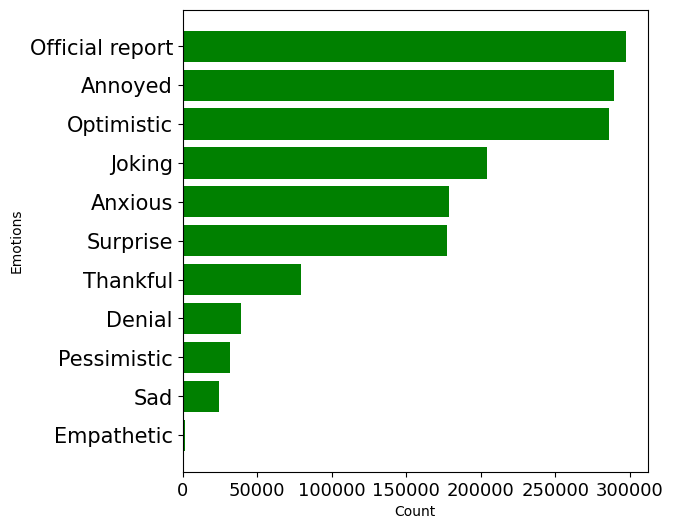

In [33]:
emotions = list(data.columns[3:14])
scores = [sum(data[x]) for x in emotions]
pairs = []

for i in range(len(emotions)):
    pairs.append((emotions[i], scores[i]))

pairs = sorted(pairs, key = lambda x : x[1], reverse = False)
emotions_sorted = []
scores_sorted = []

for pair in pairs:
    emotions_sorted.append(pair[0])
    scores_sorted.append(pair[1])

fig = plt.figure(figsize = (6, 6))
plt.barh(emotions_sorted, scores_sorted, color = 'green')
plt.yticks(fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Emotions")
plt.xlabel("Count")

In [34]:
data.iloc[:,3:14].sum().astype(int)

Optimistic         286013
Thankful            79552
Empathetic           1735
Pessimistic         31453
Anxious            178715
Sad                 24632
Annoyed            289645
Denial              38910
Official report    297177
Surprise           177495
Joking             204202
dtype: int64

<ipython-input-35-33ce72c25f43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \


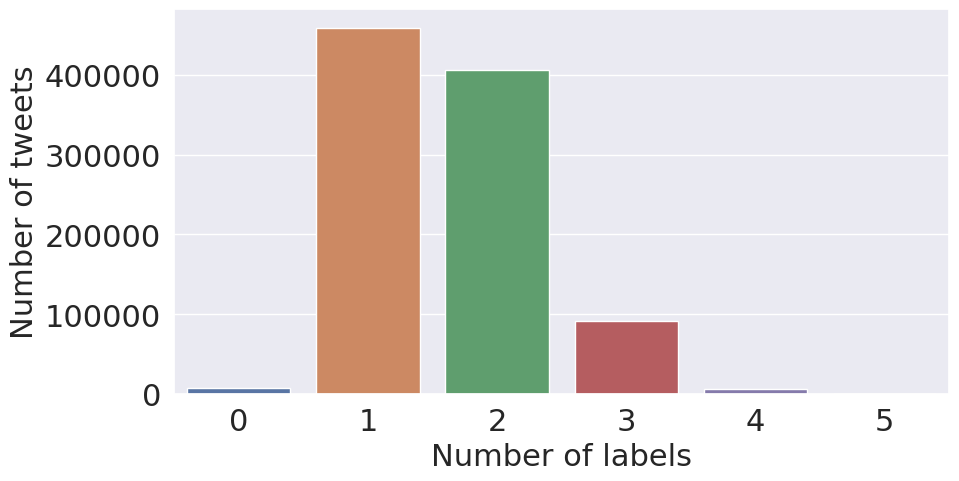

In [35]:
data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \
                        data['Official report'] + data['Surprise'] + data['Joking']
rowSums = data['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (10, 5))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [36]:
multi_label_total = {}
for value in data["n_emotions"].unique():
    multi_label_total[value] = data["n_emotions"].value_counts()[value]
multi_label_total

{2: 405845, 1: 458820, 3: 91441, 4: 6329, 0: 7884, 5: 94}

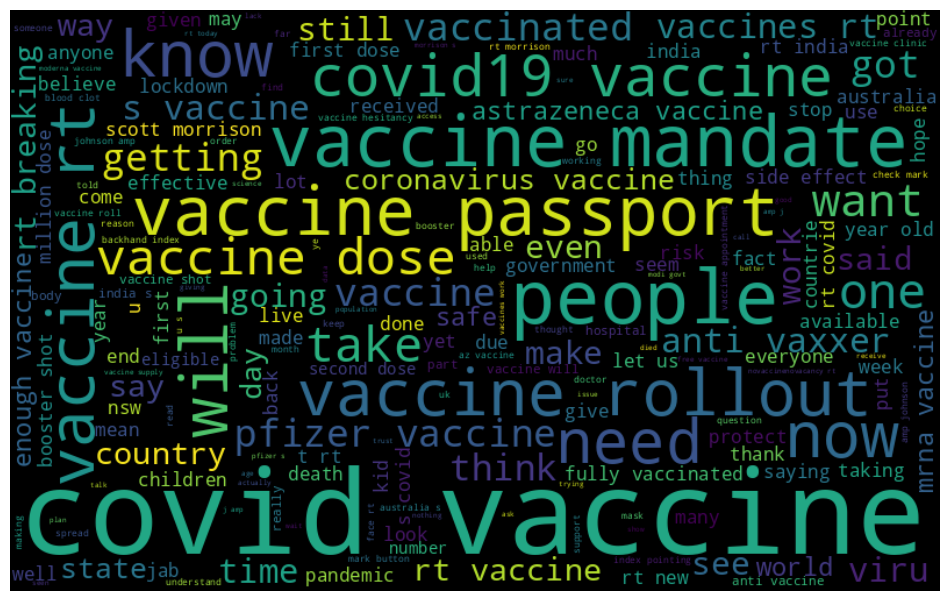

In [37]:
from wordcloud import WordCloud
MostUsedWords = " ".join([word for word in data['Tweet']])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(MostUsedWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [38]:

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [39]:

def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [40]:
data['Tweet']

0            i just cannot imagine selfish antivaxxers r...
1         rt  oh wow  so antivaxxers in melbourne are pr...
2         i think boosters at 3 months might be better f...
3          psa  this is your regular reminder that anyth...
4         rt  canada’s antimaskers antivaxxers are not a...
                                ...                        
988138    rt  ensuring high risk populations have access...
988139    rt  👩‍⚕‍ katherine chen  speaker at sanofi pas...
988140    rt  industries minister  met  head of internat...
988144    rt  during orldimmunizationweek  our head of g...
988145    rt  during orldimmunizationweek  our head of g...
Name: Tweet, Length: 970413, dtype: object

In [41]:
import re
words = clean(''.join(data['Tweet'].tolist()))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(coronavirus, vaccine)'),
  Text(0, 1, '(astrazeneca, vaccine)'),
  Text(0, 2, '(vaccine, work)'),
  Text(0, 3, '(rt, vaccine)'),
  Text(0, 4, '(vaccine, dos)'),
  Text(0, 5, '(pfizer, vaccine)'),
  Text(0, 6, '(covid19, vaccine)'),
  Text(0, 7, '(vaccine, rollout)'),
  Text(0, 8, '(get, vaccine)'),
  Text(0, 9, '(vaccine, passport)'),
  Text(0, 10, '(vaccine, rt)'),
  Text(0, 11, '(vaccine, mandate)'),
  Text(0, 12, '(covid, vaccine)'),
  Text(0, 13, '(19, vaccine)'),
  Text(0, 14, '(covid, 19)')])

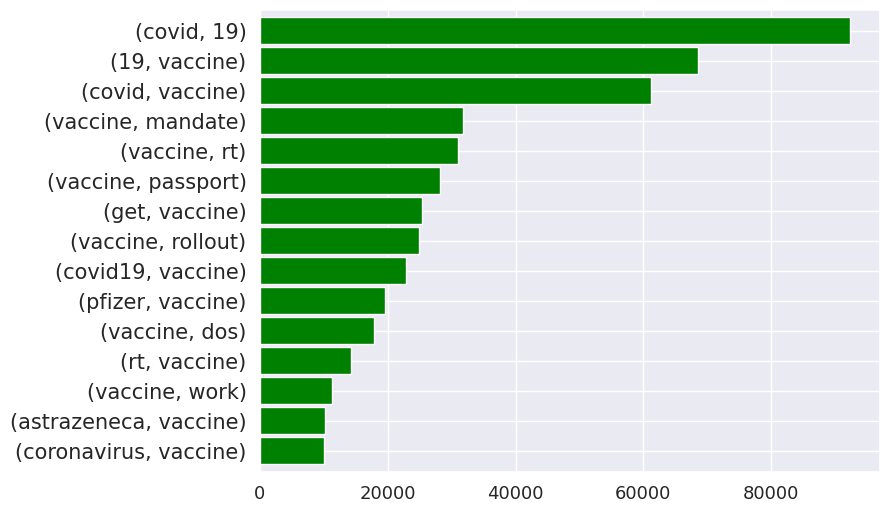

In [42]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (8, 6))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(covid, vaccine, rt)'),
  Text(0, 1, '(19, vaccine, rt)'),
  Text(0, 2, '(vaccinated, booster, know)'),
  Text(0, 3, '(booster, know, neither)'),
  Text(0, 4, '(know, neither, vaccine)'),
  Text(0, 5, '(neither, vaccine, one)'),
  Text(0, 6, '(fully, vaccinated, booster)'),
  Text(0, 7, '(get, covid, 19)'),
  Text(0, 8, '(vaccine, dos, administered)'),
  Text(0, 9, '(j, amp, j)'),
  Text(0, 10, '(dose, covid, 19)'),
  Text(0, 11, '(check, mark, button)'),
  Text(0, 12, '(johnson, amp, johnson)'),
  Text(0, 13, '(backhand, index, pointing)'),
  Text(0, 14, '(covid, 19, vaccine)')])

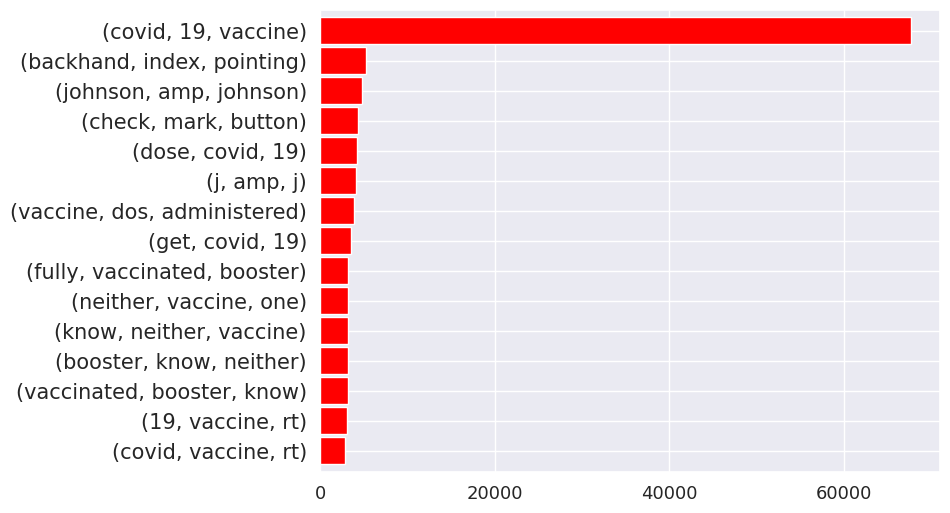

In [43]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (8, 6))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)

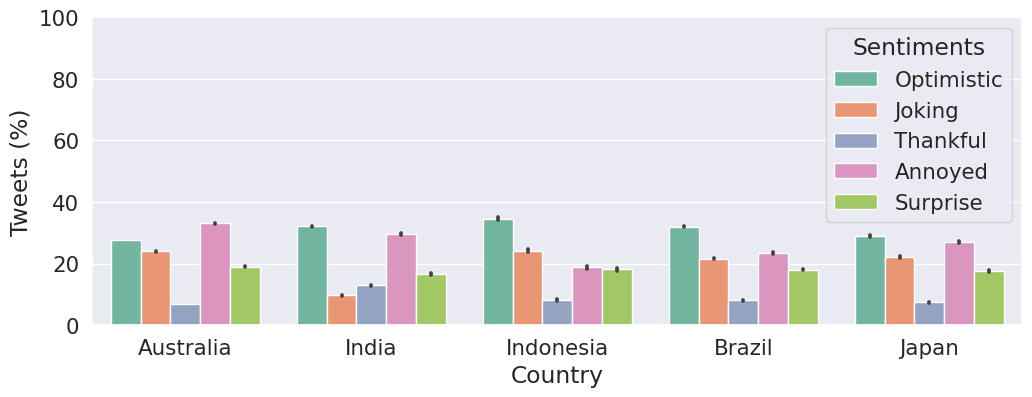

In [44]:
plt.figure(figsize = (12, 4))
sns.set(font_scale=1.4) 
melted_data = pd.melt(data, id_vars='country', value_vars=['Optimistic', 'Joking', 'Thankful','Annoyed','Surprise'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments',data=melted_data, palette='Set2')
plt.ylabel('Tweets (%)')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.show()


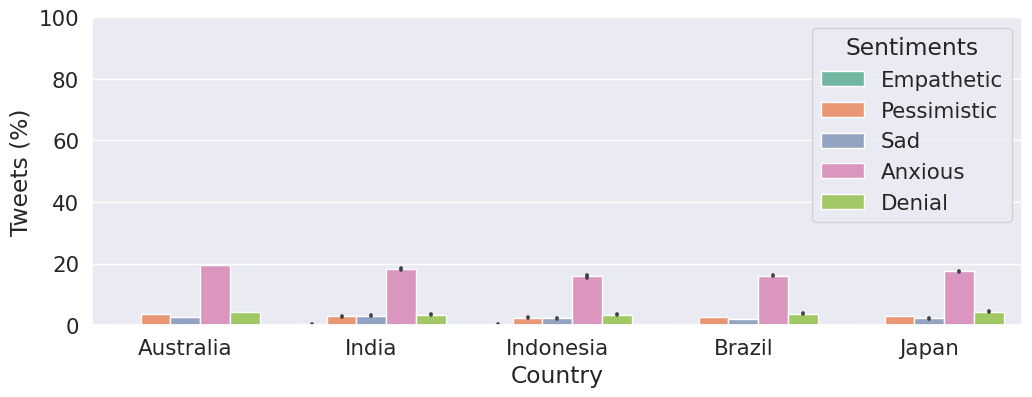

In [45]:
plt.figure(figsize = (12, 4))
sns.set(font_scale=1.4) 
melted_data = pd.melt(data, id_vars='country', value_vars=['Empathetic', 'Pessimistic', 'Sad','Anxious','Denial'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments', data=melted_data, palette='Set2')
plt.ylabel('Tweets (%)')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.show()


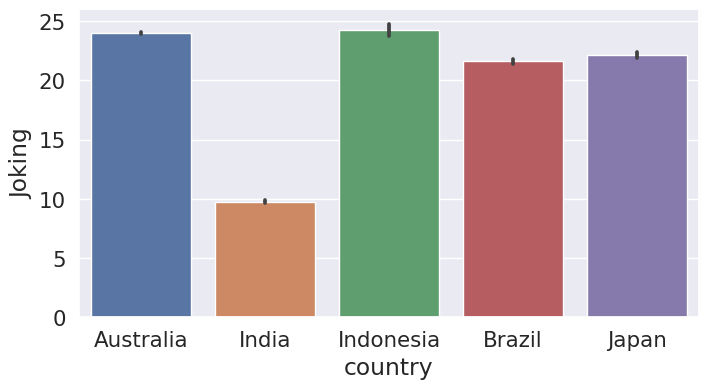

In [46]:
plt.figure(figsize = (8, 4))
sns.barplot(x=data['country'],y= data['Joking']*100)
plt.show()

<ipython-input-47-4c2b5edad879>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['polarity_score'], hist=True)


<Axes: xlabel='polarity_score', ylabel='Density'>

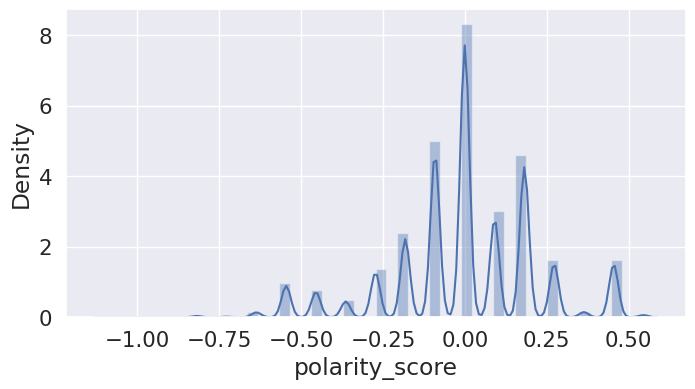

In [47]:
plt.figure(figsize = (8, 4))
sns.distplot(data['polarity_score'], hist=True)

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”)


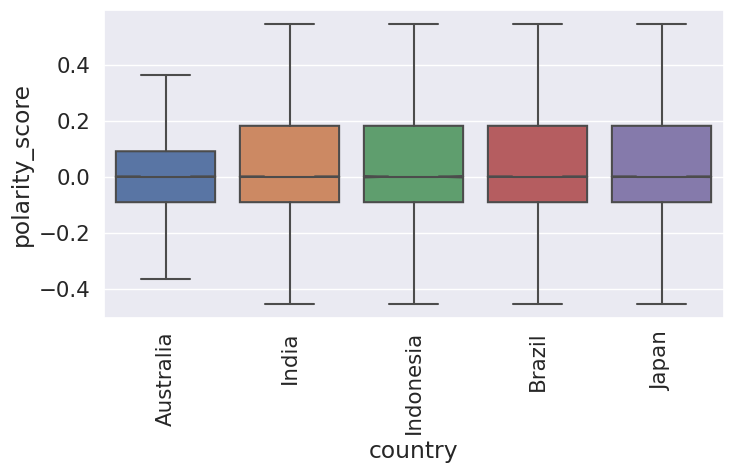

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(x='country', y='polarity_score', notch = True,
            data=data, showfliers=False)
#plt.xlabel('contry')
#plt.ylabel('polarity Score')
plt.xticks(rotation=90)
print("A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”)")

In [ ]:
#data = data.drop(columns=['n_emotions'],axis=1)

<Axes: xlabel='country', ylabel='polarity_score'>

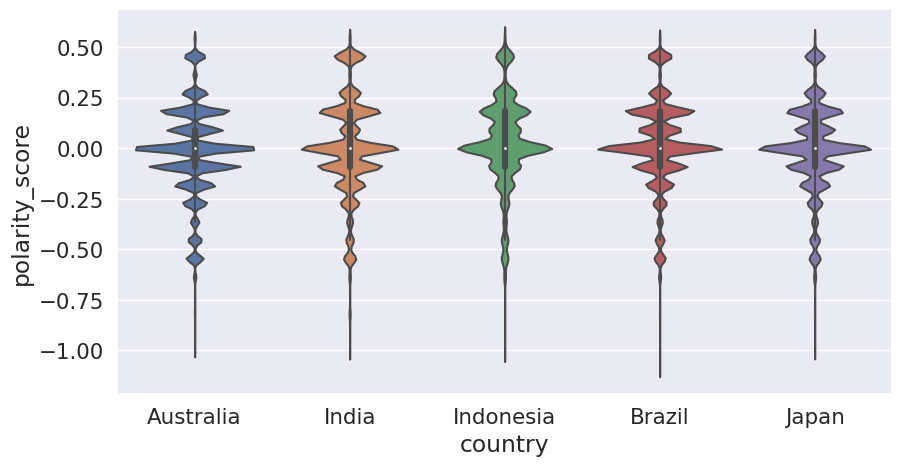

In [49]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='country',y='polarity_score')

In [50]:

data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
data = data.dropna(subset=['date'])
data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
data['month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

<ipython-input-50-ad2ca06caceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')


In [51]:
# Group the DataFrame by month, country, and sentiment and calculate the mean polarity score for each group
grouped = data.groupby(['month', 'country'])['polarity_score'].mean().reset_index()

# Rename the columns
grouped.columns = ['Month', 'Country', 'Mean Polarity']

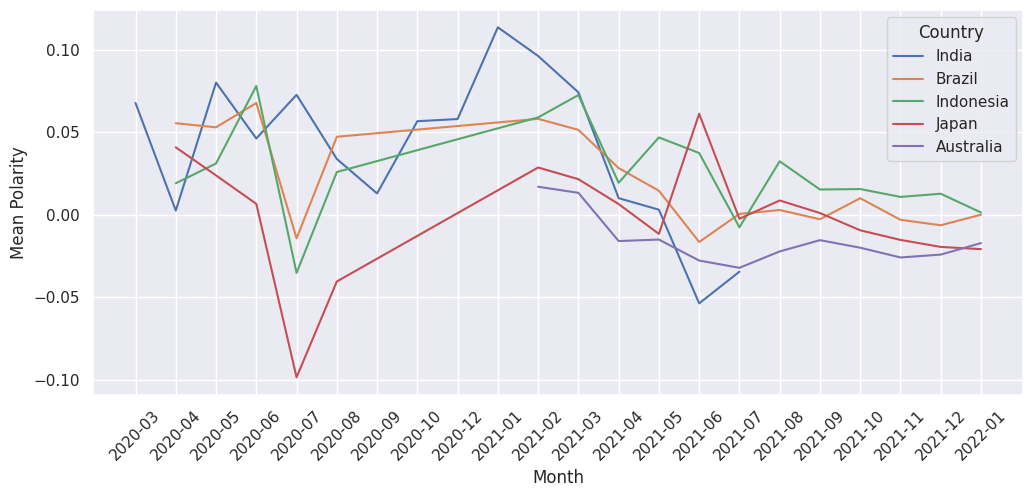

In [54]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Mean Polarity", hue="Country", data=grouped)
plt.xticks(rotation=45)
plt.show()

In [55]:
emotions = list(data.columns[3:14])
only_emotes = data[emotions]
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
988138,1,0,0,0,0,0,0,0,1,0,0
988139,0,1,0,0,0,0,0,0,1,0,0
988140,0,0,0,0,0,0,0,0,1,0,0
988144,1,1,0,0,0,0,0,0,0,0,0


In [56]:
emote_array = np.zeros((11, 11))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Surprise' : 9, 'Joking' : 10
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(11):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 11):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

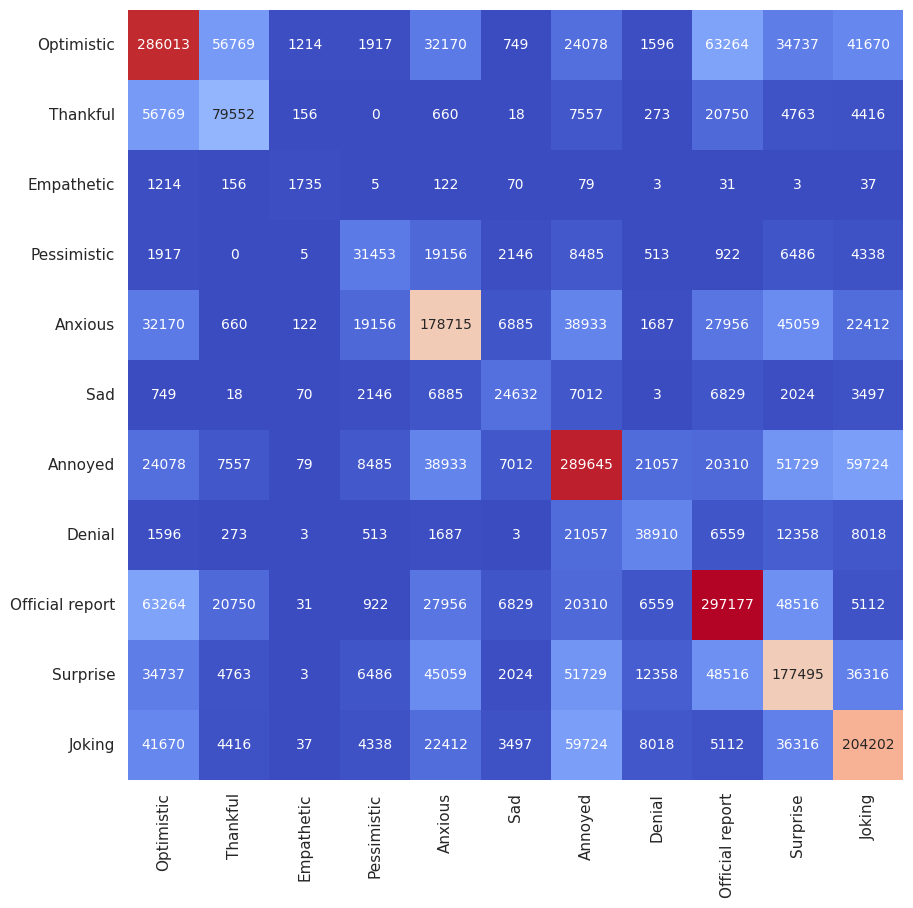

In [57]:
fig = plt.figure(figsize = (10, 10))
sns.set(font_scale = 1)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 10}, cbar = False, cbar_kws = {"shrink": .8})
     

In [58]:
data.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking', 'country', 'month', 'polarity_score',
       'n_emotions'],
      dtype='object')

In [59]:
grouped = data.groupby(['month', 'country'])['Tweet'].count().reset_index()
grouped.columns = ['Month', 'Country', 'Number of Tweets']

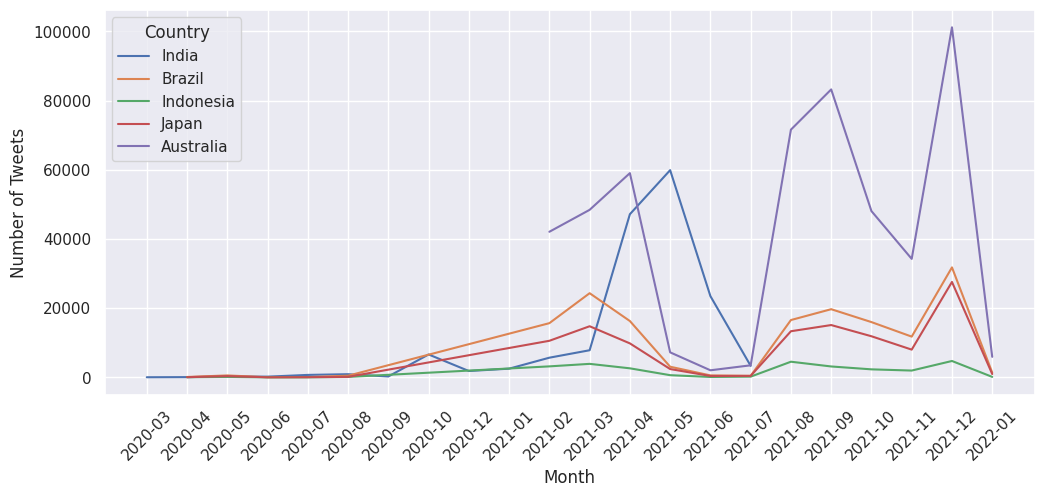

In [60]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Number of Tweets", hue="Country", data=grouped)
plt.xticks(rotation=45)
plt.show()

In [61]:
countries = ['India', 'Australia', 'Indonesia', 'Japan', 'Brazil']

data = {
    'India': [3,1998,39699,207191,605220,1804702,3848968,6391960,8229322,9533471,10324631,10778206,11123619,12302110,19919715,28440988,30453937,31725399,32902345,33789398,34295381,34615757,34922882,41803318],
    'Australia': [29,5244,6679,7133,7827,17064,25592,26749,27255,27565,28121,28475,28636,28984,29463,29781,30293,34210,55873,107926,170933,208918,456879,2527122],
    'Indonesia': [0,1790,10551,27549,57770,111455,180646,291182,415402,543975,758473,1099687,1347026,1534255,1677274,1831773,2228938,3462800,4100138,4220206,4244761,4256998,4263168,4369391],
    'Japan': [256,2385,14603,16964,18757,36765,69152,83748,101372,150731,238569,392553,433797,475901,598680,750948,803625,938672,1510072,1705466,1722880,1727430,1734292,2811050],
    'Brazil': [2,6918,97096,559771,1551965,2748948,4023777,4876320,5576685,6472608,7759867,9342932,10657517,12926819,14853980,16837143,18759785,20040368,20968754,21445651,21814693,22118782,22293228,25813685]
}


In [62]:
df = pd.DataFrame(data)
df['month'] = ['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02']

In [63]:
df.index = pd.to_datetime(df['month'])

In [64]:
df.index

DatetimeIndex(['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01'],
              dtype='datetime64[ns]', name='month', freq=None)

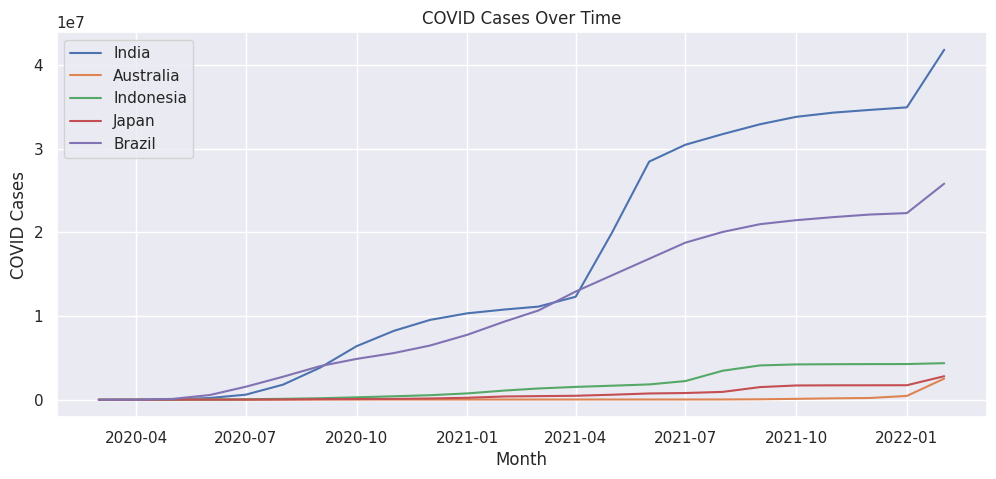

In [65]:
plt.figure(figsize=(12, 5))
for country in countries:
    plt.plot(df.index, df[country], label=country)
plt.xlabel('Month')
plt.ylabel('COVID Cases')
plt.title('COVID Cases Over Time')
plt.legend()
plt.show()


In [66]:

countries = ['India', 'Australia', 'Indonesia', 'Japan', 'Brazil']

DATA = {
    'India':[3,1995,37701,167492,398029,1199482,2044266,2542992,1837362,1304149,791160,453575,345413,1178491,7617605,8521273,2012949,1271462,1176946,887053,505983,320376,307125],
    'Australia':[29,5215,1435,454,694,9237,8528,1157,506,310,556,354,161,348,479,318,512,3917,21663,52053,63007,37985,247961],
    'Indonesia':[0,1790,8761,16998,30221,53685,69191,110536,124220,128573,214498,341214,247339,187229,143019,154499,397165,1233862,637338,120068,24555,12237,6170],
    'Japan': [256,2129,12218,2361,1793,18008,32387,14596,17624,49359,87838,153984,41244,42104,122779,152268,52677,135047,571400,195394,17414,4550,6862],
    'Brazil': [2,6916,90178,462675,992194,1196983,1274829,852543,700365,895923,1287259,1583065,1314585,2269302,1927161,1983163,1922642,1280583,928386,476897,369042,304089,174446]
}

In [67]:
DF = pd.DataFrame(DATA)
DF['month'] = ['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01']

In [68]:
DF.index = pd.to_datetime(DF['month'])

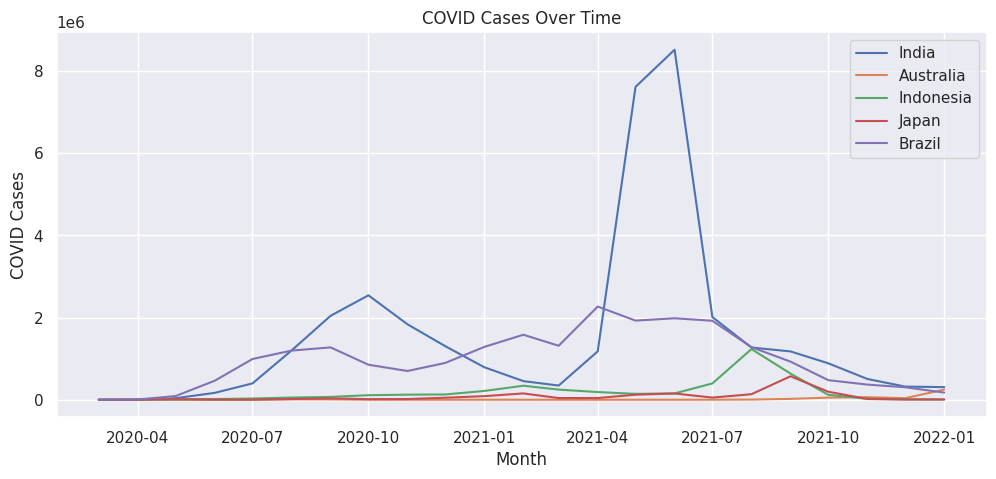

In [69]:
plt.figure(figsize=(12, 5))
for country in countries:
    plt.plot(DF.index, DF[country], label=country)
plt.xlabel('Month')
plt.ylabel('COVID Cases')
plt.title('COVID Cases Over Time')
plt.legend()
plt.show()
